In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

trades = pd.read_csv("https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/CBA_trades.csv")
trades.head()

,Time,Price $,Volume,Value $,Market,Condition
0,6/10/2021 17:00,100.0800,12904,1291432.320,ASX,ET XT
1,6/10/2021 16:54,100.0800,19280,1929542.400,ASX,ET XT
2,6/10/2021 16:47,100.3127,18517,1857490.266,CXA,SX XT
3,6/10/2021 16:46,100.0800,5364,536829.120,CXA,NaN
4,6/10/2021 16:45,100.0800,24624,2464369.920,ASX,ET XT


##### Now, we needc to transform the trade panadas dataframe into a format with datetime as the index. Look at volume of trades vs time.

In [2]:
trades.Time = pd.to_datetime(trades.Time)
trades.set_index('Time', inplace=True)
trades

,Price $,Volume,Value $,Market,Condition
Time,,,,,
2021-06-10 17:00:00,100.0800,12904,1291432.320,ASX,ET XT
2021-06-10 16:54:00,100.0800,19280,1929542.400,ASX,ET XT
2021-06-10 16:47:00,100.3127,18517,1857490.266,CXA,SX XT
2021-06-10 16:46:00,100.0800,5364,536829.120,CXA,NaN
2021-06-10 16:45:00,100.0800,24624,2464369.920,ASX,ET XT
...,...,...,...,...,...
2021-06-10 07:05:00,95.0100,6000,570060.000,ASX,EC XT
2021-06-10 07:05:00,94.0100,1200,112812.000,ASX,EC
2021-06-10 07:05:00,94.0100,18700,1757987.000,ASX,EC XT


<Axes: xlabel='Time'>

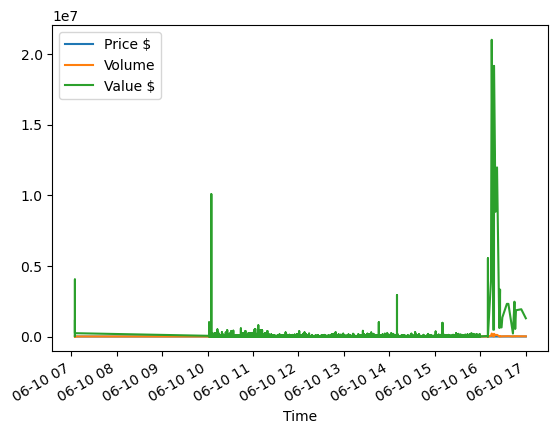

In [3]:
trades.plot()

###### From above figure, we can see that the opening hour is aroud 10 am, and it ends at 16 pm. So, we extract this part by using a mask

In [4]:
mask = (trades.index > dt.datetime(2021, 6, 10, 10, 0, 0)) & (trades.index <= dt.datetime(2021, 6, 10, 16, 0, 0))
trades_mh = trades.iloc[mask] # if false, dont show.
trades_mh.head()

,Price $,Volume,Value $,Market,Condition
Time,,,,,
2021-06-10 15:59:00,100.00,3,300.00,ASX,NaN
2021-06-10 15:59:00,100.00,21,2100.00,ASX,NaN
2021-06-10 15:59:00,99.96,2,199.92,ASX,XT
2021-06-10 15:59:00,99.96,1,99.96,ASX,XT
2021-06-10 15:59:00,100.00,7,700.00,ASX,NaN


<Axes: xlabel='Time'>

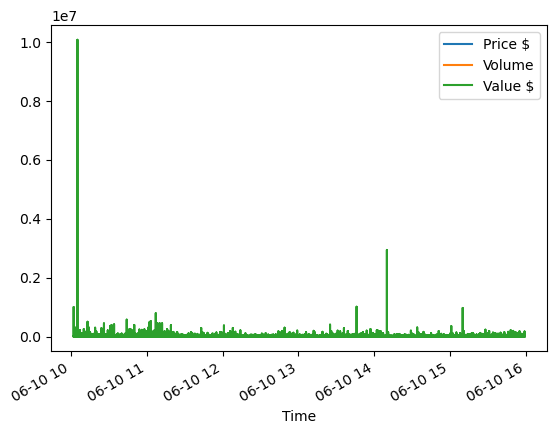

In [5]:
trades_mh.plot()

# Time Bars

In [6]:
time_bars = trades_mh.groupby(pd.Grouper(freq='5min')).agg({'Price $': 'ohlc', 'Volume': 'sum'})
time_bars

Price $                          Volume
                       open    high     low   close  Volume
Time                                                       
2021-06-10 10:00:00  102.93  103.07  101.91  102.66  199410
2021-06-10 10:05:00  102.50  102.59  102.06  102.27  184996
2021-06-10 10:10:00  102.12  102.23  101.66  102.15  130369
2021-06-10 10:15:00  101.55  101.67  101.22  101.49  150677
2021-06-10 10:20:00  101.09  101.38  101.01  101.22  133160
...                     ...     ...     ...     ...     ...
2021-06-10 15:35:00  100.06  100.11   99.90  100.02   75094
2021-06-10 15:40:00  100.08  100.14   99.95  100.00   66823
2021-06-10 15:45:00   99.98  100.09   99.93  100.07   74807
2021-06-10 15:50:00   99.99  100.04   99.92   99.95   96170
2021-06-10 15:55:00   99.84  100.00   99.76   99.92   94605

[72 rows x 5 columns]

In [7]:
time_bars_price = time_bars.loc[:, 'Price $']
time_bars_price

,open,high,low,close
Time,,,,
2021-06-10 10:00:00,102.93,103.07,101.91,102.66
2021-06-10 10:05:00,102.50,102.59,102.06,102.27
2021-06-10 10:10:00,102.12,102.23,101.66,102.15
2021-06-10 10:15:00,101.55,101.67,101.22,101.49
2021-06-10 10:20:00,101.09,101.38,101.01,101.22
...,...,...,...,...
2021-06-10 15:35:00,100.06,100.11,99.90,100.02
2021-06-10 15:40:00,100.08,100.14,99.95,100.00
2021-06-10 15:45:00,99.98,100.09,99.93,100.07


In [8]:
time_bars = np.log(time_bars_price.close/time_bars_price.close.shift(1)).dropna() # dropna remove the first time period
time_bars

Time
2021-06-10 10:05:00   -0.003806
2021-06-10 10:10:00   -0.001174
2021-06-10 10:15:00   -0.006482
2021-06-10 10:20:00   -0.002664
2021-06-10 10:25:00   -0.003960
                         ...   
2021-06-10 15:35:00    0.001000
2021-06-10 15:40:00   -0.000200
2021-06-10 15:45:00    0.000700
2021-06-10 15:50:00   -0.001200
2021-06-10 15:55:00   -0.000300
Freq: 5T, Name: close, Length: 71, dtype: float64

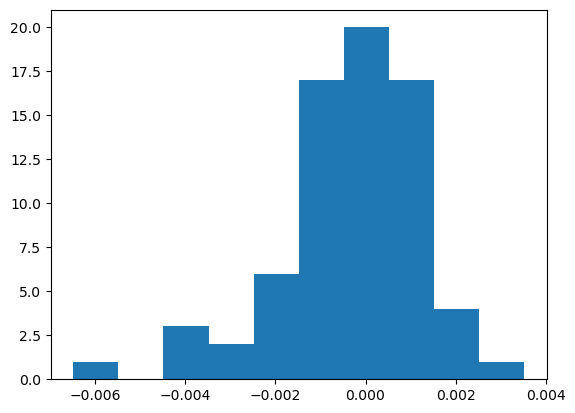

In [9]:
bin_len = 0.001
plt.hist(time_bars, bins=np.arange(min(time_bars),max(time_bars)+bin_len, bin_len))
plt.show()

# Tick Bars

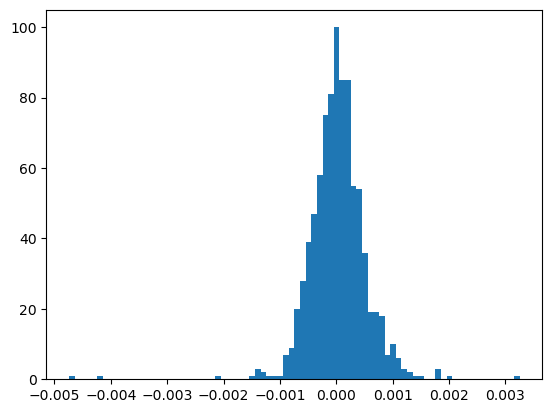

In [11]:
def bar(x, y):
    return np.int64(x/y)*y
transactions = 75
tick_bars = trades_mh.groupby(bar(np.arange(len(trades_mh)), transactions)).agg({'Price $': 'ohlc', 'Volume': 'sum'})
tick_bars_price = tick_bars.loc[:, 'Price $']
tick_bars_price
tick_bars = np.log(tick_bars_price.close/tick_bars_price.close.shift(1)).dropna() # change
bin_len = 0.0001
plt.hist(tick_bars, bins=np.arange(min(tick_bars),max(tick_bars)+bin_len, bin_len))
plt.show()

# Volume Bars

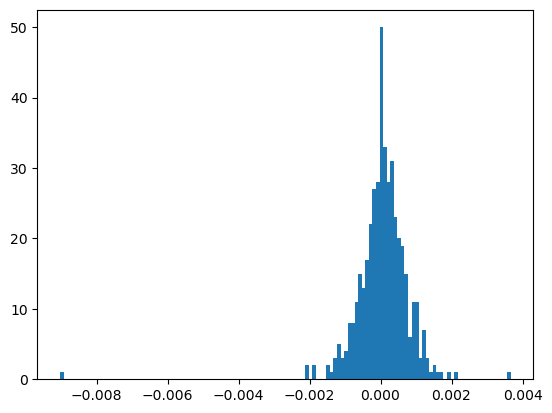

In [12]:
traded_volume = 10000
volume_bars = trades_mh.groupby(bar(np.cumsum(trades_mh['Volume']), traded_volume)).agg({'Price $': 'ohlc', 'Volume': 'sum'})
volume_bars_price = volume_bars.loc[:,'Price $']
volume_bars_price
volume_bars = np.log(volume_bars_price.close/volume_bars_price.close.shift(1)).dropna()
bin_len = 0.0001
plt.hist(volume_bars, bins=np.arange(min(volume_bars),max(volume_bars)+bin_len, bin_len))
plt.show()

# Dollar Bars

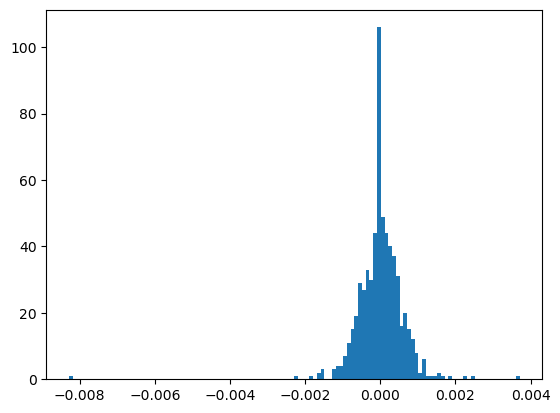

In [13]:
market_value = 700000
dollar_bars = trades_mh.groupby(bar(np.cumsum(trades_mh['Value $']), market_value)).agg({'Price $': 'ohlc', 'Volume':'sum'})
dollar_bars_price = dollar_bars.loc[:,'Price $']
dollar_bars_price
dollar_bars = np.log(dollar_bars_price.close/dollar_bars_price.close.shift(1)).dropna()
bin_len = 0.0001
plt.hist(dollar_bars, bins=np.arange(min(dollar_bars),max(dollar_bars)+bin_len, bin_len))
plt.show()

# Plot Distribution

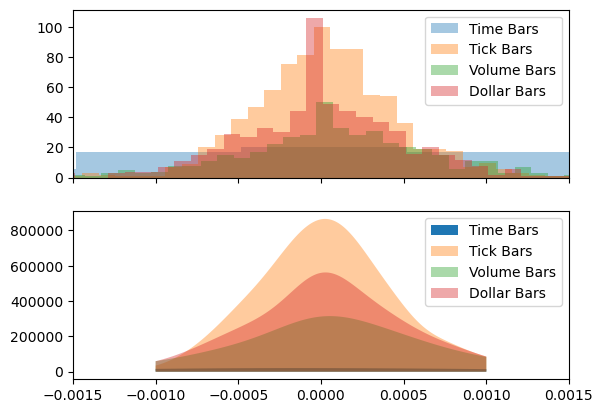

81

In [15]:
from scipy import stats
import seaborn as sns
cdmx_edad = np.random.normal(0, 20,10000)+10
ed_sup_edad = dollar_bars
dollar_bars = np.log(dollar_bars_price.close/dollar_bars_price.close.shift(1)).dropna()
volume_bars = np.log(volume_bars_price.close/volume_bars_price.close.shift(1)).dropna()
tick_bars = np.log(tick_bars_price.close/tick_bars_price.close.shift(1)).dropna()
time_bars = np.log(time_bars_price.close/time_bars_price.close.shift(1)).dropna()
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
# bins = np.arange(10,61,1)
bin_len = 0.001
ax1.hist(time_bars, bins=np.arange(min(time_bars),max(time_bars)+bin_len, bin_len),alpha=0.4, label='Time Bars')
bin_len = 0.0001
ax1.hist(tick_bars, bins=np.arange(min(tick_bars),max(tick_bars)+bin_len, bin_len),alpha=0.4, label='Tick Bars')
ax1.hist(volume_bars, bins=np.arange(min(volume_bars),max(volume_bars)+bin_len, bin_len),alpha=0.4, label='Volume Bars')
ax1.hist(dollar_bars, bins=np.arange(min(dollar_bars),max(dollar_bars)+bin_len, bin_len),alpha=0.4, label='Dollar Bars')
ax1.legend()
dollar_bars_kde = stats.gaussian_kde(dollar_bars)
tick_bars_kde = stats.gaussian_kde(tick_bars)
volume_bars_kde = stats.gaussian_kde(volume_bars)
time_bars_kde = stats.gaussian_kde(time_bars)
x = np.linspace(-0.001,0.001,500)
dollar_bars_curve = dollar_bars_kde(x)*dollar_bars.shape[0]
tick_bars_curve = tick_bars_kde(x)*tick_bars.shape[0]
volume_bars_curve = volume_bars_kde(x)*volume_bars.shape[0]
time_bars_curve = time_bars_kde(x)*time_bars.shape[0]
# ax2.plot(x, cdmx_curve, color='r')
ax2.fill_between(x, 0, time_bars_curve, alpha=1, label='Time Bars')
ax2.fill_between(x, 0, tick_bars_curve, alpha=0.4, label='Tick Bars')
ax2.fill_between(x, 0, volume_bars_curve, alpha=0.4, label='Volume Bars')
ax2.fill_between(x, 0, dollar_bars_curve, alpha=0.4, label='Dollar Bars')
ax1.set_xlim(-0.0015,0.0015)
# ax2.plot(x, ed_sup_curve, color='b')
ax2.legend()
plt.show()
len_tick_bars =  np.arange(min(tick_bars),max(tick_bars)+bin_len, bin_len)
len(len_tick_bars)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2220\3564804188.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dollar_bars, gridsize=1000, shade=True, label='Dollar Bars')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2220\3564804188.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(volume_bars, gridsize=1000, shade=True, label='Volume Bars')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2220\3564804188.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tick_bars, gridsize=25, shade=True, label='Tick Bars')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2220\3564804188.py:4: FutureWarning: 



Text(0.5, 1.0, 'KDE of Standard Price & Volume Bars')

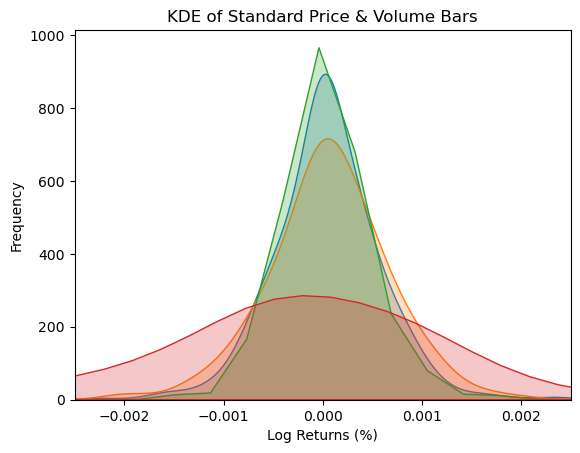

In [16]:
sns.kdeplot(dollar_bars, gridsize=1000, shade=True, label='Dollar Bars')
sns.kdeplot(volume_bars, gridsize=1000, shade=True, label='Volume Bars')
sns.kdeplot(tick_bars, gridsize=25, shade=True, label='Tick Bars')
sns.kdeplot(time_bars, gridsize=50, shade=True, label='Time Bars')
plt.xlim(-0.0025,0.0025)
plt.xlabel('Log Returns (%)')
plt.ylabel('Frequency')
plt.title('KDE of Standard Price & Volume Bars')